# Confidence Interval - Difference In Means¶
Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

1. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. Use your interval to start answering the first quiz question below.

2. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21. Build a 99% confidence interval using your sampling distribution. Use your interval to finish answering the first quiz question below.

3. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to start answering question 2 below.

4. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals over 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions.


In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200) #this is the only data you might actually get in the real world.

In [2]:
# Printing the first 5 rows
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


### 1. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. Use your interval to start answering the first quiz question below.

In [3]:
# For 10,000 iterations, bootstrap sample your sample data, 
# compute the difference in the average heights for coffee and non-coffee drinkers.
diff = []

for _ in range(10000):
    bootsample = full_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample.drinks_coffee == True].height.mean()
    mean_non_coff = bootsample[bootsample.drinks_coffee == False].height.mean()
    diff.append(mean_coff - mean_non_coff)

In [4]:
# Build a 99% confidence interval using your sampling distribution.
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(0.7804195541448713, 3.1064330970321623)

### 2. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21. Build a 99% confidence interval using your sampling distribution. Use your interval to finish answering the first quiz question below.


In [5]:
# For 10,000 iterations, bootstrap sample your sample data,
# compute the difference in the average heights for those older than 21 and those younger than 21. 
diff = []

for _ in range(10000):
    bootsample = full_data.sample(200, replace=True)
    mean_older = bootsample[bootsample.age == '>=21'].height.mean()
    mean_younger = bootsample[bootsample.age == '<21'].height.mean()
    diff.append(mean_older - mean_younger)

In [6]:
# Build a 99% confidence interval using your sampling distribution.
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(2.932526071671697, 4.82863626627284)

### 3. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to start answering question 2 below.


In [7]:
# For 10,000 iterations bootstrap your sample data, compute the difference in the average height for
# coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old. 
diff = []

for _ in range(10000):
    bootsample = full_data.sample(200, replace=True)
    mean_coff_under = bootsample[(bootsample.age=='<21') & (bootsample.drinks_coffee==True)].height.mean()
    mean_non_coff_under = bootsample[(bootsample.age=='<21') & (bootsample.drinks_coffee==False)].height.mean()
    diff.append(mean_coff_under - mean_non_coff_under)

In [8]:
# Using your sampling distribution, build a 95% confidence interval.
np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(-2.4972231518682966, -0.8758191572224626)

### 4. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals over 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions.


In [9]:
# For 10,000 iterations bootstrap your sample data, compute the difference in the average height for
# coffee drinkers and the average height for non-coffee drinkers for individuals over 21 years old. 
diff = []
coffee_over_mean = []
non_coffee_over_mean = []

for _ in range(10000):
    bootsample = full_data.sample(200, replace=True)
    mean_coff_over = bootsample[(bootsample.age=='>=21') & (bootsample.drinks_coffee==True)].height.mean()
    mean_non_coff_over = bootsample[(bootsample.age=='>=21') & (bootsample.drinks_coffee==False)].height.mean()
    
    coffee_over_mean.append(mean_coff_over)
    non_coffee_over_mean.append(mean_non_coff_over)
    diff.append(mean_coff_over - mean_non_coff_over)

In [10]:
# Using your sampling distribution, build a 95% confidence interval.
np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(-3.273448679731676, -0.6111639620219028)

#### plot the last example

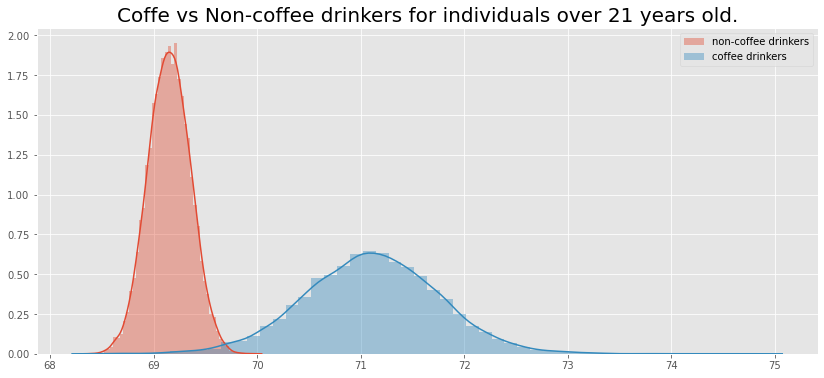

In [11]:
import seaborn as sns

plt.figure(figsize=[14, 6])

sns.distplot(coffee_over_mean)
sns.distplot(non_coffee_over_mean)
plt.legend(['non-coffee drinkers','coffee drinkers'])
plt.title("Coffe vs Non-coffee drinkers for individuals over 21 years old.", fontsize = 20);

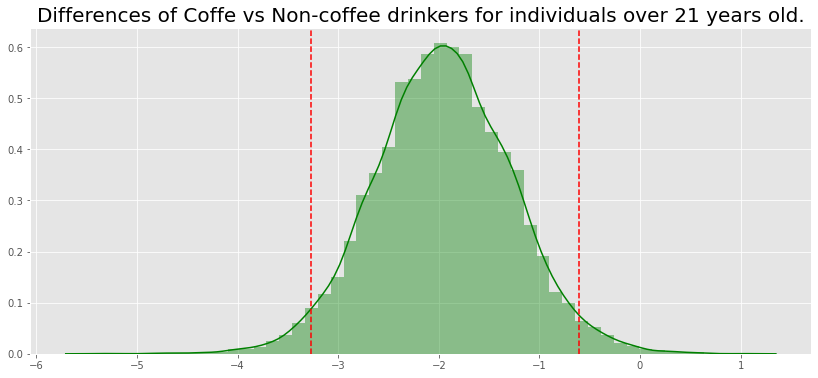

In [12]:
plt.figure(figsize = [14, 6])
sns.distplot(diff, color = 'green')
plt.title("Differences of Coffe vs Non-coffee drinkers for individuals over 21 years old.", fontsize = 20)
plt.axvline(x = np.percentile(diff, 2.5), color = 'r', linestyle = 'dashed')
plt.axvline(x = np.percentile(diff, 97.5), color = 'r', linestyle = 'dashed');